# Heart Disease Predictor

- This *test* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Life cycle of a Data Science project:
- Data Collection
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

In [102]:
data = pd.read_csv('./data/framingham.csv')

In [103]:
data.shape

(4238, 16)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [105]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 1. EDA

In [106]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

- visualize the *null values*

<AxesSubplot:>

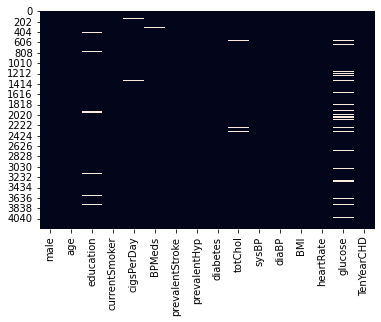

In [107]:
sns.heatmap(data.isnull(), cbar=False)

- There are some features having null values so, we need to perform imputation in the dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 388/4238 = 0.091 or *9.1%* approx.

- A python function for unique values:

In [108]:
def unique_vals(col):
    return list(col.unique())

- A python function for count of all unique values in a feature:

In [114]:
def count_unique_vals(col):
    unique_vals = {}
    for i in col:
        if np.isnan(i):
            continue
        if i not in unique_vals:
            unique_vals[i] = 1
        else:
            unique_vals[i] += 1
    return unique_vals

- all unique values of education

In [110]:
unique_vals(data.education)

[4.0, 2.0, 1.0, 3.0, nan]

- what impact would **education** have on Ten-year-coronary-heart-disease?
- **NO** impact right?
- So, it's just right to drop this feature itself.
- let's drop it.

In [111]:
data.drop('education', axis=1, inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- in order to perform successfull imputation, without much affecting the dataset, we'll have to categorize those features having null values as **categorical/nominal** or **continuous**.
- referring from the description given for the dataset it's visible that:
    - cigsPerDay, totChol, BMI, heartRate, glucose are **continuous** features.
    - BPMeds is a **nominal** feature.
- Handlling missing values:
    1. for nominal feature: replace with the most frequent value.
    2. for continuous features: perform mean/median imputation.

Distribution of **BPMeds** in the entire dataset:

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

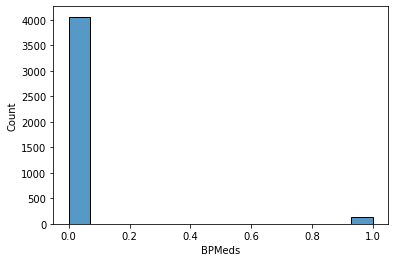

In [112]:
sns.histplot(data.BPMeds)

- count unique vals before imputation

In [115]:
count_unique_vals(data.BPMeds)

{0.0: 4061, 1.0: 124}

- most frequent value is **0**
- let's impute it's mode.

In [116]:
data['BPMeds'].fillna(data.iloc[4].mode().item(), inplace=True)
data['BPMeds'].isnull().sum()

0

In [117]:
count_unique_vals(data.BPMeds)

{0.0: 4114, 1.0: 124}

- So, the missing values of BPMeds are handlled.
- *Nominal value imputation is complete!*
- Now imputing continuous values!
---

In [22]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

- No categorical features. All features are Nominal, so no encoding required.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [24]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- check for duplicates

In [25]:
data_dup = data.duplicated()
data_dup.sum()

0

- so we have 723 duplicates in the dataset. So, let's drop them.

In [26]:
data.drop_duplicates(inplace=True)
data.shape

(4238, 16)

In [27]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


- plot *correlation matrix*

<AxesSubplot:>

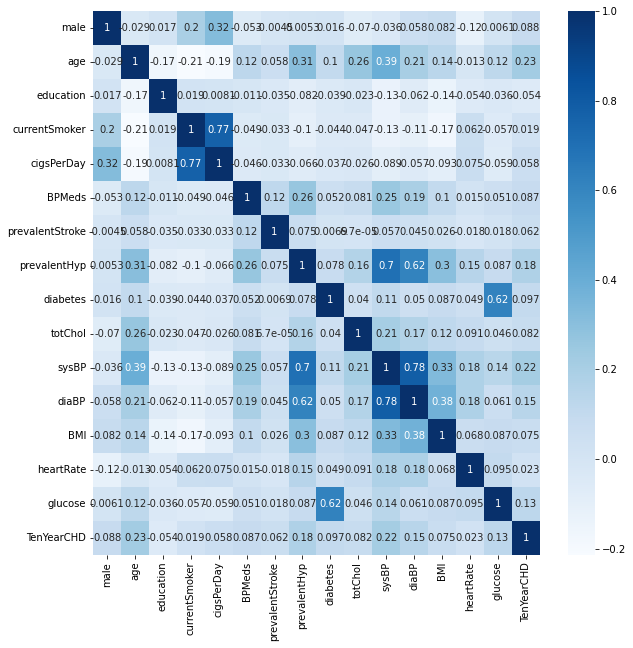

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, cmap='Blues', annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

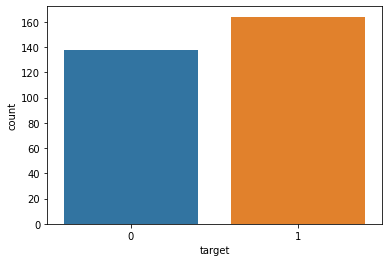

In [ ]:
sns.countplot(x='target', data=data)

### Count the no. of males and females

In [ ]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

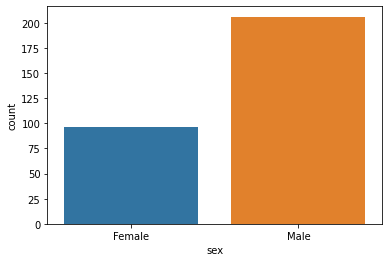

In [ ]:
sns.countplot(x='sex', data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

### Categorize males and females on the basis of disease or no disease

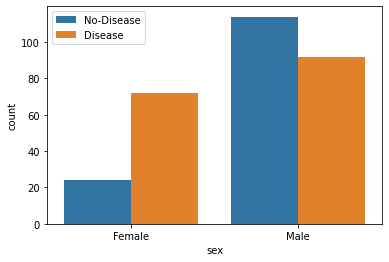

In [ ]:
sns.countplot(x='sex', data=data, hue='target')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

In [ ]:
data.target.unique()

array([0, 1])

- the above values of the target variable are categorical and since this is a classification problem, i.e the person has or doesn't have the disease, applying the **Logistic regression** model can be suitable

### 2. Feature selection

In [ ]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                column_name = corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [ ]:
corr_features = correlation(data, 0.85)
print(set(corr_features))

set()


- so, there are no features that are correlated to more than 85%
- no need to drop any of the features, except for the **traget** variable during the training process

### 3. Split the dataset

In [ ]:
X = data.drop(['target'],axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(211, 13)
(91, 13)


In [ ]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2
334,60,1,0,130,206,0,0,132,1,2.4,1,2,3
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2
240,54,0,1,132,288,1,0,159,1,0.0,2,1,2
353,57,1,0,110,201,0,1,126,1,1.5,1,0,1


In [ ]:
y_train.head()

128    1
334    0
333    1
240    1
353    1
Name: target, dtype: int64

### 4. Perform feature scaling

### Which features needs to be scaled?
Features that are out of the scale of the normal range of the dataset need to be brought in the same range as the others. For example the range of **age** is not the same or even closer to **sex, cp** and some other features. So features like these needs to be scaled down.

**Feature scaling is performed on the following features** on both X_train as well as X_test:

age, trestbps, chol, thalach, oldpeak

- Scale X_train

In [ ]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
128,-0.258557,1,2,0.388437,-0.431939,0,1,0.865615,0,-0.878501,2,4,2
334,0.600586,1,0,-0.075270,-0.759709,0,0,-0.717763,1,1.197434,1,2,3
333,-0.043772,0,2,-1.234538,-0.605465,0,1,0.394881,0,0.505456,1,0,2
240,-0.043772,0,1,0.040657,0.821297,1,0,0.437675,1,-0.878501,2,1,2
353,0.278407,1,0,-1.234538,-0.856112,0,1,-0.974527,1,0.418958,1,0,1


- Scale X_test

In [ ]:
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,-0.173694,1,0,-0.512770,0.644740,0,1,-2.618806,1,0.766908,1,2,3
40,1.263230,0,2,1.525596,2.170704,0,0,-0.019383,0,-0.263182,2,0,2
10,1.981692,0,0,-1.118770,-1.957224,0,1,-1.226258,0,0.423545,1,0,2
182,0.664512,1,0,0.423777,0.859940,0,0,0.862564,0,0.080181,1,2,3
175,0.185537,0,0,3.729234,0.762122,1,0,-0.854912,1,2.483726,0,2,3


### 5. Train and fit the model
1. Logistic regression

1. **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_pred, y_test)
log_reg.score(X_test, y_test)

0.8681318681318682